<a href="https://colab.research.google.com/github/pavithranair/Convolutional-and-Feedforward-Neural-Networks/blob/main/ACM_ASC_CNN_and_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN)

# Binary Classification

1. Become one with the data (visualize)
2. Preprocess the data (scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

## 1. Import and Visualise the data

In [23]:
!pip install kaggle
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "~/.kaggle/"
os.environ['KAGGLE_USERNAME'] = 'pavithrapmnair'
os.environ['KAGGLE_KEY'] = '5d0de2c4f8c351f3f76541610e80f27d'

In [33]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
'username':"pavithrapmnair" ,
'key':"5d0de2c4f8c351f3f76541610e80f27d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d vivmankar/asian-vs-african-elephant-image-classification

asian-vs-african-elephant-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!unzip asian-vs-african-elephant-image-classification.zip

Archive:  asian-vs-african-elephant-image-classification.zip
  inflating: dataset/test/African/af_te1.jpg  
  inflating: dataset/test/African/af_te10.jpg  
  inflating: dataset/test/African/af_te11.jpg  
  inflating: dataset/test/African/af_te12.jpg  
  inflating: dataset/test/African/af_te13.jpg  
  inflating: dataset/test/African/af_te14.jpg  
  inflating: dataset/test/African/af_te15.jpg  
  inflating: dataset/test/African/af_te16.jpg  
  inflating: dataset/test/African/af_te17.jpg  
  inflating: dataset/test/African/af_te18.jpg  
  inflating: dataset/test/African/af_te19.jpg  
  inflating: dataset/test/African/af_te2.jpg  
  inflating: dataset/test/African/af_te20.jpg  
  inflating: dataset/test/African/af_te21.jpg  
  inflating: dataset/test/African/af_te22.jpg  
  inflating: dataset/test/African/af_te23.jpg  
  inflating: dataset/test/African/af_te24.jpg  
  inflating: dataset/test/African/af_te25.jpg  
  inflating: dataset/test/African/af_te26.jpg  
  inflating: dataset/test/Afr

In [37]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

['as_tr180.jpg']
Image shape: (168, 300, 3)
['af_tr216.jpg']
Image shape: (182, 277, 3)


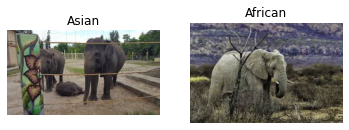

In [38]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
asian_img = view_random_image("dataset/train/", "Asian")
plt.subplot(1, 2, 2)
african_img = view_random_image("dataset/train/", "African")

## 2. Preprocess the data (scaling/normalizing)

In [39]:
# Define the directory dataset paths
train_dir = "dataset/train/"
test_dir = "dataset/test/"

In [40]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


## 3. Create a CNN model (start with a baseline)

In [72]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import tensorflow as tf

In [80]:
# Set random seed
tf.random.set_seed(22)

CNN_model = Sequential([
                        Conv2D(filters=10,
                               kernel_size=3,
                               strides=1,
                               padding="valid",
                               activation="relu",
                               input_shape=(224, 224, 3)),
                        Conv2D(10, 3, activation="relu"),
                        Conv2D(10, 3, activation="relu"),
                        Flatten(),
                        Dense(1, activation="sigmoid")
])

In [81]:
# Compile the model
CNN_model.compile(loss="binary_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])

## 4. Fit the model

In [82]:
history_baseline = CNN_model.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data))

Epoch 1/10
27/27 [==============================] - 6s 221ms/step - loss: 3.0255 - accuracy: 0.4821 - val_loss: 1.2931 - val_accuracy: 0.4840
Epoch 2/10
27/27 [==============================] - 5s 190ms/step - loss: 0.8309 - accuracy: 0.4845 - val_loss: 0.7029 - val_accuracy: 0.5851
Epoch 3/10
27/27 [==============================] - 5s 193ms/step - loss: 0.6840 - accuracy: 0.7060 - val_loss: 0.6733 - val_accuracy: 0.6809
Epoch 4/10
27/27 [==============================] - 5s 191ms/step - loss: 0.6672 - accuracy: 0.7262 - val_loss: 0.6649 - val_accuracy: 0.5798
Epoch 5/10
27/27 [==============================] - 5s 191ms/step - loss: 0.6388 - accuracy: 0.7619 - val_loss: 0.6433 - val_accuracy: 0.8138
Epoch 6/10
27/27 [==============================] - 5s 194ms/step - loss: 0.5669 - accuracy: 0.8131 - val_loss: 0.5688 - val_accuracy: 0.7234
Epoch 7/10
27/27 [==============================] - 5s 193ms/step - loss: 0.4380 - accuracy: 0.8452 - val_loss: 0.5288 - val_accuracy: 0.7181
Epoch 

## 5. Evaluate the model

In [83]:
CNN_model.evaluate(test_data)

6/6 [==============================] - 3s 530ms/step - loss: 0.4828 - accuracy: 0.7713


[0.48283153772354126, 0.771276593208313]

In [47]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

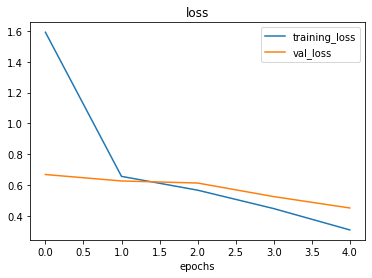

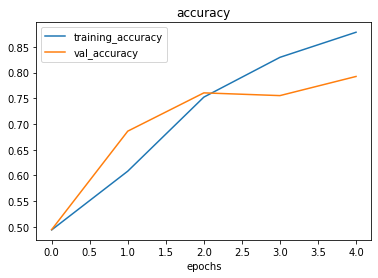

In [48]:
plot_loss_curves(history_baseline)

## 6. Adjust the model hyperparameters

### 1. Add regularization layers (such as MaxPool2D)

In [49]:
# Create the model
CNN_model_regularize = Sequential([
                      Conv2D(filters=10, # number of sliding windows going across an input (higher = more complex)
                             kernel_size=3, # size of sliding window going across an input
                             activation="relu",
                             input_shape=(224, 224, 3)), # input layer (specify input shape)
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid") # Working with binary classification so only 1 output neuron
])

In [50]:
# Compile the model
CNN_model_regularize.compile(loss="binary_crossentropy",
                             optimizer=Adam(),
                             metrics=["accuracy"])

In [51]:
# Fit the model
history_regularize = CNN_model_regularize.fit(train_data,
                                              epochs=5,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
27/27 [==============================] - 7s 227ms/step - loss: 0.6931 - accuracy: 0.5095 - val_loss: 0.6943 - val_accuracy: 0.4840
Epoch 2/5
27/27 [==============================] - 5s 193ms/step - loss: 0.6861 - accuracy: 0.5702 - val_loss: 0.6818 - val_accuracy: 0.4840
Epoch 3/5
27/27 [==============================] - 5s 190ms/step - loss: 0.6652 - accuracy: 0.6012 - val_loss: 0.6330 - val_accuracy: 0.6543
Epoch 4/5
27/27 [==============================] - 5s 192ms/step - loss: 0.6489 - accuracy: 0.6298 - val_loss: 0.6153 - val_accuracy: 0.6436
Epoch 5/5
27/27 [==============================] - 5s 193ms/step - loss: 0.6200 - accuracy: 0.6631 - val_loss: 0.5868 - val_accuracy: 0.6862


In [52]:
CNN_model_regularize.evaluate(test_data)

6/6 [==============================] - 3s 578ms/step - loss: 0.5868 - accuracy: 0.6862


[0.5867668390274048, 0.686170220375061]

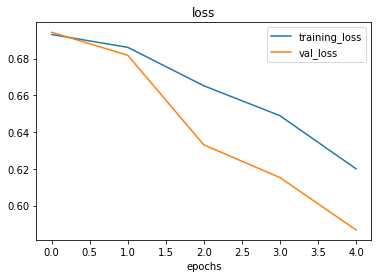

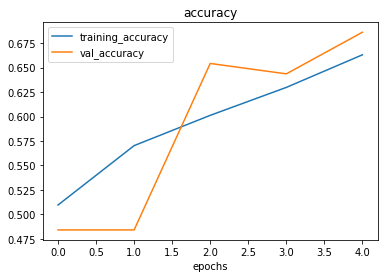

In [53]:
plot_loss_curves(history_regularize)

It is observed that adding regularization layers further reduced the validation accuracy.

### 2. Data Augmentation

In [54]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/225.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [55]:
# Import data and augment it from training directory
print("Augmented training data: ")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

# Create non-augmented training data
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data your working with
                                               batch_size=32,
                                               shuffle=False) # Size of mini batches

IMG_SIZE = (224, 224)
# Create non-augmented test data
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode="binary",
                                             batch_size=32)

Augmented training data: 
Found 840 images belonging to 2 classes.
Non-augmented training data: 
Found 840 images belonging to 2 classes.
Non-augmented test data: 
Found 188 images belonging to 2 classes.


In [56]:
# Create the model 
model_regularization_augmented = Sequential([
                                              Conv2D(filters=10, # number of sliding windows going across an input (higher = more complex)
                                                    kernel_size=3, # size of sliding window going across an input
                                                    activation="relu",
                                                    input_shape=(224, 224, 3)), # input layer (specify input shape)
                                              MaxPool2D(pool_size=2),
                                              Conv2D(10, 3, activation="relu"),
                                              MaxPool2D(),
                                              Conv2D(10, 3, activation="relu"),
                                              MaxPool2D(),
                                              Flatten(),
                                              Dense(1, activation="sigmoid") # Working with binary classification so only 1 output neuron
])

# Compile the model
model_regularization_augmented.compile(loss="binary_crossentropy",
                                       optimizer=Adam(),
                                       metrics=["accuracy"])

# Fit the model
history_regularization_augmented = model_regularization_augmented.fit(train_data_augmented_shuffled,
                                                                      epochs=5,
                                                                      steps_per_epoch=len(train_data_augmented_shuffled),
                                                                      validation_data=test_data,
                                                                      validation_steps=len(test_data))

Epoch 1/5
27/27 [==============================] - 15s 554ms/step - loss: 0.6952 - accuracy: 0.5048 - val_loss: 0.6813 - val_accuracy: 0.6064
Epoch 2/5
27/27 [==============================] - 13s 470ms/step - loss: 0.6873 - accuracy: 0.5286 - val_loss: 0.6660 - val_accuracy: 0.6755
Epoch 3/5
27/27 [==============================] - 13s 471ms/step - loss: 0.6867 - accuracy: 0.5690 - val_loss: 0.6617 - val_accuracy: 0.6489
Epoch 4/5
27/27 [==============================] - 13s 468ms/step - loss: 0.6807 - accuracy: 0.5798 - val_loss: 0.6540 - val_accuracy: 0.6330
Epoch 5/5
27/27 [==============================] - 13s 468ms/step - loss: 0.6769 - accuracy: 0.5786 - val_loss: 0.6341 - val_accuracy: 0.6596


In [58]:
model_regularization_augmented.evaluate(test_data)

6/6 [==============================] - 3s 561ms/step - loss: 0.6341 - accuracy: 0.6596


[0.6341209411621094, 0.6595744490623474]

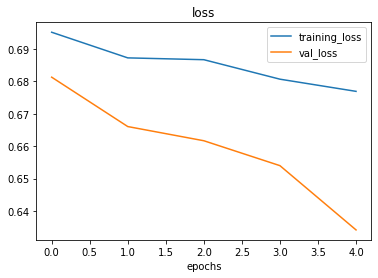

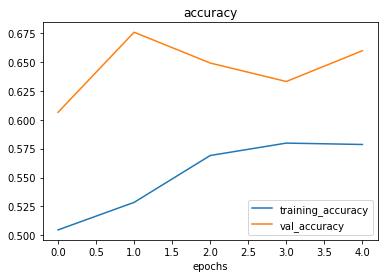

In [59]:
plot_loss_curves(history_regularization_augmented)

This is performing even poorer than the previous two models. Hence, we can stick to our baseline model. 

## Making predictions on custom data

In [84]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [91]:
def pred_and_plot(model, filename, class_names=["african", "asian"]):
  # Load and prep image
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [92]:
!wget https://raw.githubusercontent.com/pavithranair/Convolutional-and-Feedforward-Neural-Networks/main/african_elephant.jpg
african_elephant = mpimg.imread("african_elephant.jpg")

--2022-07-10 12:37:05--  https://raw.githubusercontent.com/pavithranair/Convolutional-and-Feedforward-Neural-Networks/main/african_elephant.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7158 (7.0K) [image/jpeg]
Saving to: ‘african_elephant.jpg.1’

african_elephant.jp 100%[===================>]   6.99K  --.-KB/s    in 0s      

2022-07-10 12:37:05 (62.2 MB/s) - ‘african_elephant.jpg.1’ saved [7158/7158]



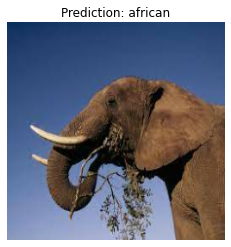

In [93]:
# Test our model on a custom image
pred_and_plot(CNN_model, "african_elephant.jpg")

In [94]:
!wget https://raw.githubusercontent.com/pavithranair/Convolutional-and-Feedforward-Neural-Networks/main/asian_elephant.jpg
african_elephant = mpimg.imread("asian_elephant.jpg")

--2022-07-10 12:38:08--  https://raw.githubusercontent.com/pavithranair/Convolutional-and-Feedforward-Neural-Networks/main/asian_elephant.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5223 (5.1K) [image/jpeg]
Saving to: ‘asian_elephant.jpg’

asian_elephant.jpg  100%[===================>]   5.10K  --.-KB/s    in 0s      

2022-07-10 12:38:08 (52.4 MB/s) - ‘asian_elephant.jpg’ saved [5223/5223]



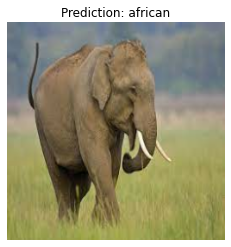

In [97]:
# Test our model on a custom image
pred_and_plot(CNN_model, "asian_elephant.jpg")